# House Price Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import FastMarkerCluster

In [2]:
#Importing the dataset
df = pd.read_csv('home_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.shape

(21613, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
df.nunique()

id               21436
date               372
price             4032
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

# Data Preprocessing

In [8]:
#Dividing the dataframe into training and test
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [9]:
df_train.shape

(17290, 21)

In [10]:
df_test.shape

(4323, 21)

In [11]:
df_train.drop(['id', 'date'], axis=1, inplace=True)
df_train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6325,325000,3,1.75,1780,13095,1.0,0,0,4,9,1780,0,1983,0,98042,47.3670,-122.152,2750,13095
13473,257000,2,1.00,1000,3700,1.0,0,0,3,6,800,200,1929,0,98118,47.5520,-122.290,1270,5000
17614,228500,3,1.00,1080,7486,1.5,0,0,3,6,990,90,1942,0,98146,47.4838,-122.335,1170,7800
16970,288000,3,2.25,2090,7500,1.0,0,0,4,7,1280,810,1977,0,98031,47.3951,-122.172,1800,7350
20868,479000,2,2.50,1741,1439,2.0,0,0,3,8,1446,295,2007,0,98034,47.7043,-122.209,2090,10454


In [12]:
#Changing float to integer
df_train['bathrooms'] = df_train['bathrooms'].astype(int)
df_train['floors'] = df_train['floors'].astype(int)

In [13]:
#Renaming the column yr_built to age and changing the values to age
df_train.rename(columns = {'yr_built':'age'}, inplace=True)
df_train['age'] = 2024 - df_train['age']

In [14]:
#changing the column yr_renovated to renovated and changing the values to 0 and 1
df_train.rename(columns={'yr_renovated':'renovated'}, inplace=True)
df_train['renovated']=df_train['renovated'].apply(lambda x: 0 if x == 0 else 1)

In [15]:
#using simple feature scaling
df_train['sqft_living'] = df_train['sqft_living']/df_train['sqft_living'].max()
df_train['sqft_living15'] = df_train['sqft_living15']/df_train['sqft_living15'].max()
df_train['sqft_lot'] = df_train['sqft_lot']/df_train['sqft_lot'].max()
df_train['sqft_above'] = df_train['sqft_above']/df_train['sqft_above'].max()
df_train['sqft_basement'] = df_train['sqft_basement']/df_train['sqft_basement'].max()
df_train['sqft_lot15'] = df_train['sqft_lot15']/df_train['sqft_lot15'].max()

In [16]:
df_train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6325,325000,3,1,0.147718,0.011242,1,0,0,4,9,0.200903,0.000000,41,0,98042,47.3670,-122.152,0.442834,0.015031
13473,257000,2,1,0.082988,0.003177,1,0,0,3,6,0.090293,0.041494,95,0,98118,47.5520,-122.290,0.204509,0.005739
17614,228500,3,1,0.089627,0.006427,1,0,0,3,6,0.111738,0.018672,82,0,98146,47.4838,-122.335,0.188406,0.008953
16970,288000,3,2,0.173444,0.006439,1,0,0,4,7,0.144470,0.168050,47,0,98031,47.3951,-122.172,0.289855,0.008437
20868,479000,2,2,0.144481,0.001235,2,0,0,3,8,0.163205,0.061203,17,0,98034,47.7043,-122.209,0.336554,0.012000


# Data Analysis 

In [17]:
#using correlation statistical method to find the relation between the price and other features
df_train.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701701
grade            0.665093
sqft_above       0.603255
sqft_living15    0.582667
bathrooms        0.511202
view             0.392108
sqft_basement    0.321387
lat              0.310770
bedrooms         0.308262
waterfront       0.252946
floors           0.234233
renovated        0.127426
sqft_lot         0.091039
sqft_lot15       0.079152
condition        0.036344
long             0.023486
age             -0.049100
zipcode         -0.053803
Name: price, dtype: float64

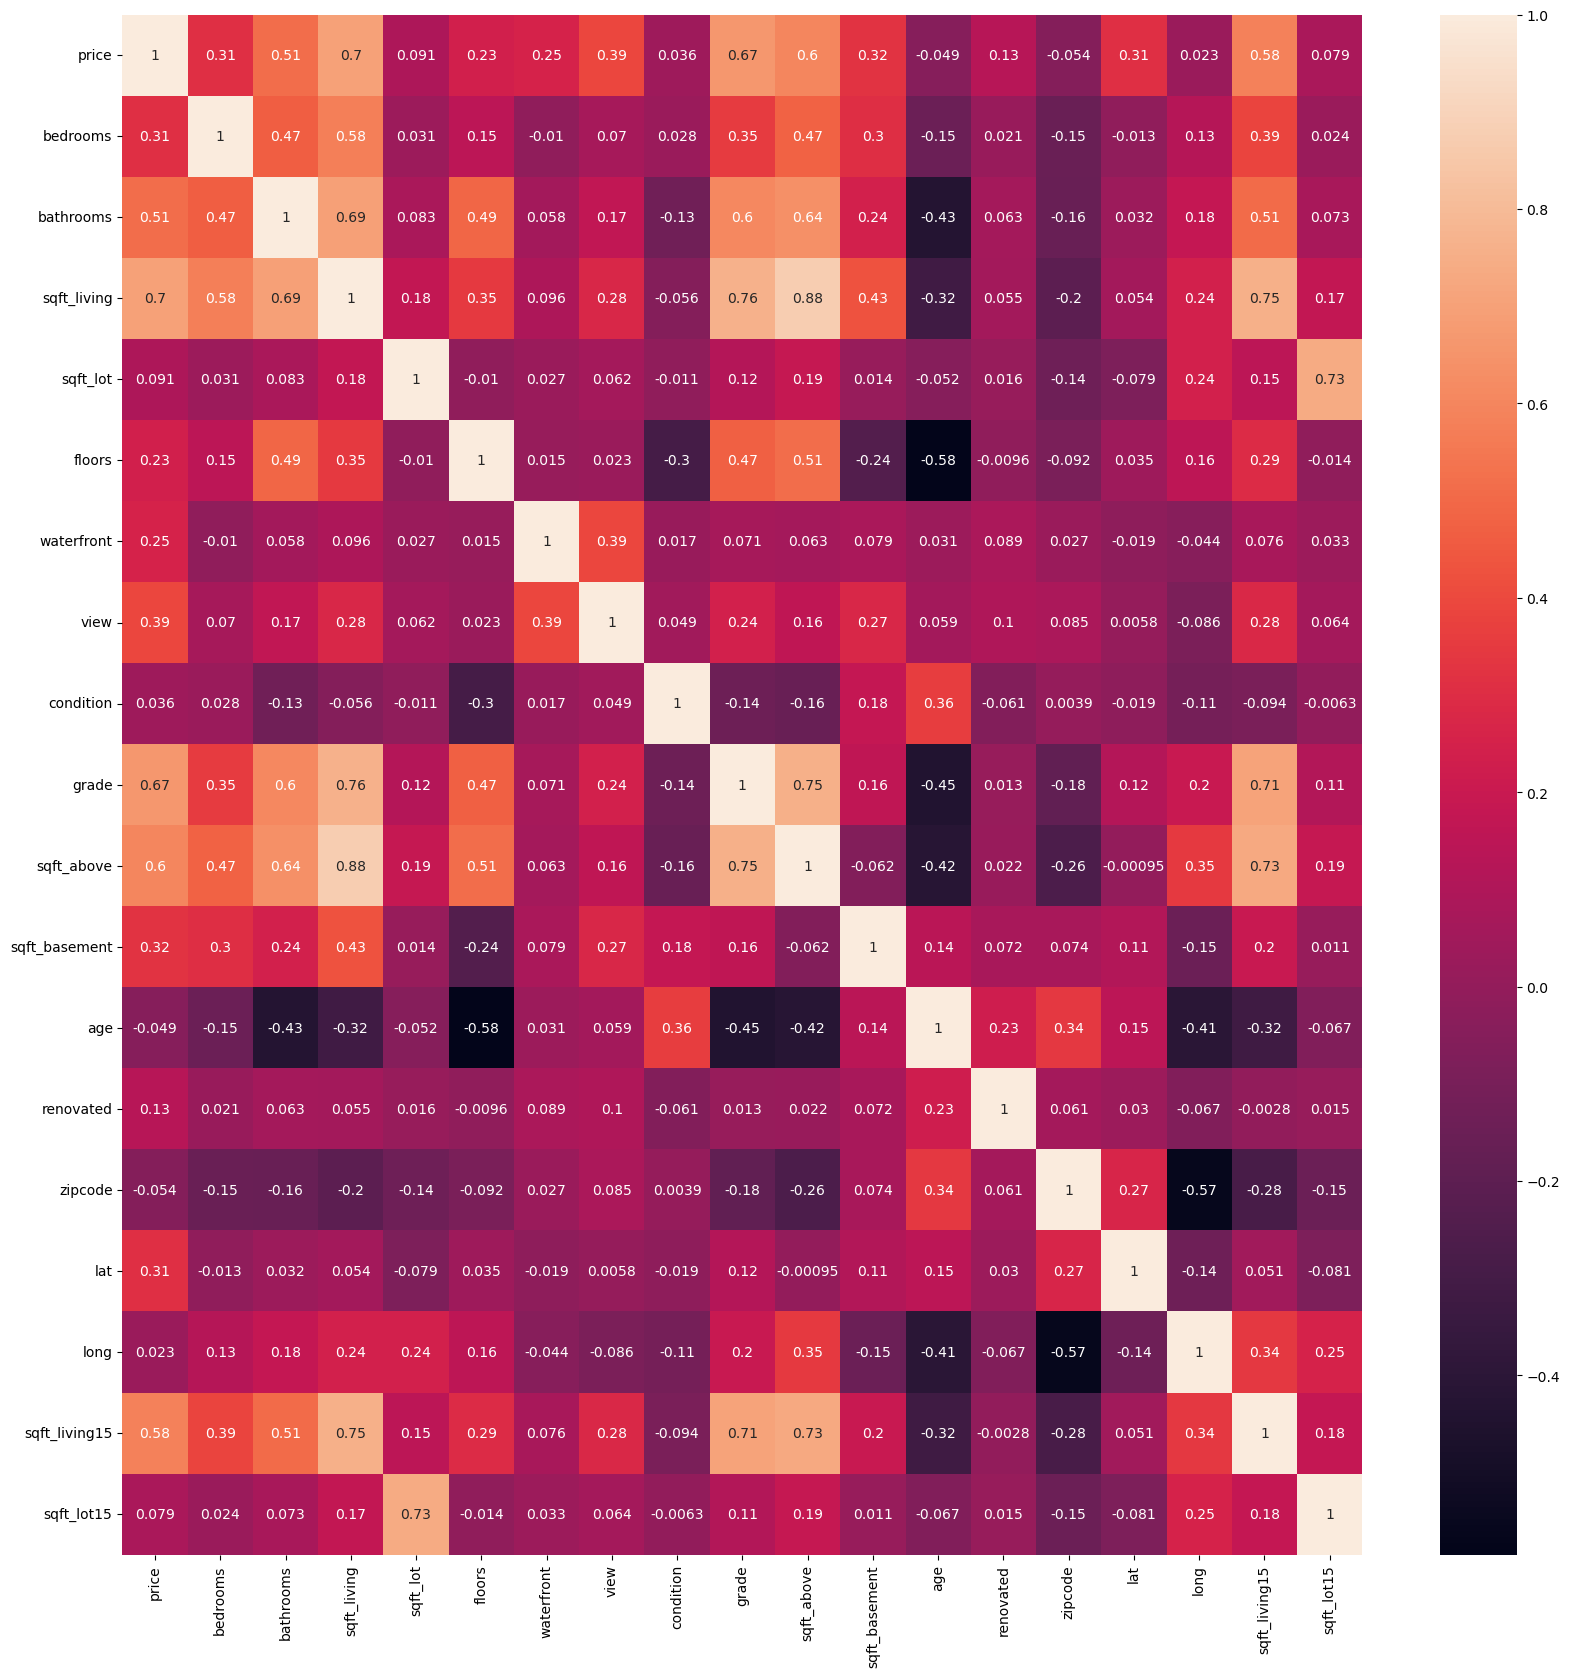

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(), annot=True)
plt.show()

<Axes: >

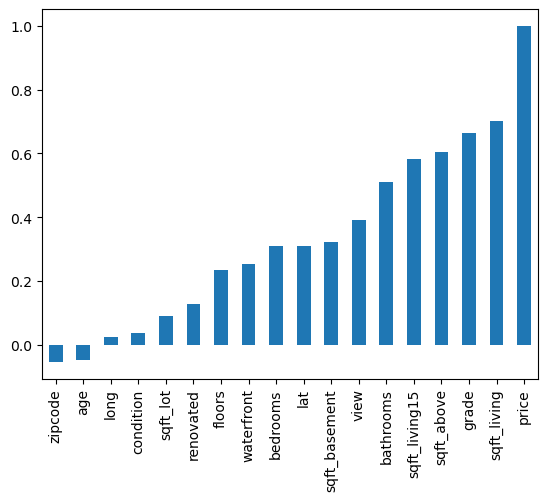

In [19]:
df_train.corr()['price'][:-1].sort_values().plot(kind='bar')

<Axes: xlabel='age', ylabel='renovated'>

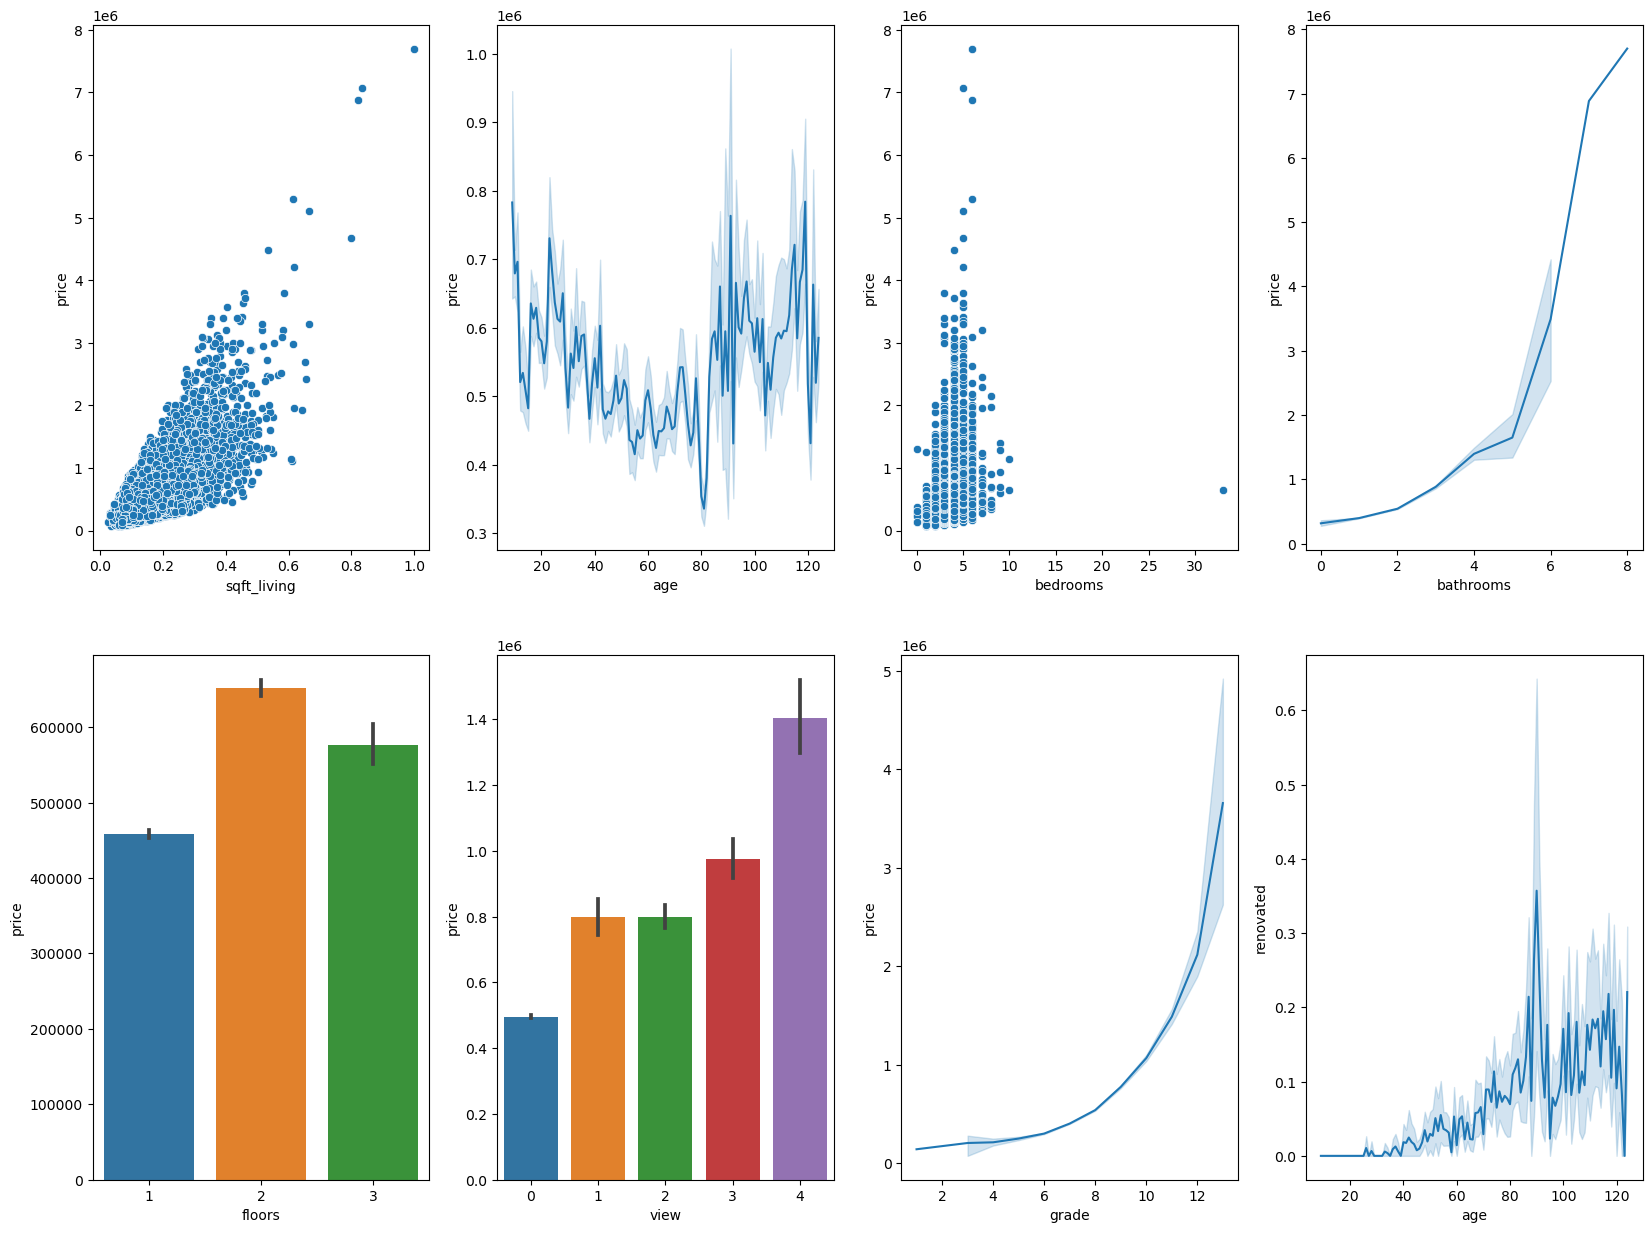

In [20]:
fig, ax = plt.subplots(2,4,figsize=(20,15))
sns.scatterplot(x=df_train['sqft_living'], y=df_train['price'], ax=ax[0,0])
sns.lineplot(x=df_train['age'], y=df_train['price'], ax=ax[0,1])
sns.scatterplot(x=df_train['bedrooms'], y=df_train['price'], ax=ax[0,2])
sns.lineplot(x=df_train['bathrooms'], y=df_train['price'], ax=ax[0,3])
sns.barplot(x=df_train['floors'], y=df_train['price'], ax=ax[1,0])
sns.barplot(x=df_train['view'], y=df_train['price'], ax=ax[1,1])
sns.lineplot(x=df_train['grade'], y=df_train['price'], ax=ax[1,2])
sns.lineplot(x=df_train['age'], y=df_train['renovated'], ax=ax[1,3])

In [58]:
df_train['price_range'] = pd.cut(df_train['price'], bins=[0, 321950, 450000, 645000, 1295648, 5000000], labels=['Low', 'Medium', 'High', 'Very High', 'The biggest'])

map = folium.Map(location=[47.5480, -121.9836], zoom_start=8)

marker_cluster = FastMarkerCluster(df_train[['lat', 'long']].values.tolist()).add_to(map)

map

In [23]:
df_train['price_range_numeric'] = df_train['price_range'].map({ 'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4, 'The biggest':5 })
df_train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,age,renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_range,price_range_numeric
6325,325000,3,1,0.147718,0.011242,1,0,0,4,9,...,0.000000,41,0,98042,47.3670,-122.152,0.442834,0.015031,Medium,2
13473,257000,2,1,0.082988,0.003177,1,0,0,3,6,...,0.041494,95,0,98118,47.5520,-122.290,0.204509,0.005739,Low,1
17614,228500,3,1,0.089627,0.006427,1,0,0,3,6,...,0.018672,82,0,98146,47.4838,-122.335,0.188406,0.008953,Low,1
16970,288000,3,2,0.173444,0.006439,1,0,0,4,7,...,0.168050,47,0,98031,47.3951,-122.172,0.289855,0.008437,Low,1
20868,479000,2,2,0.144481,0.001235,2,0,0,3,8,...,0.061203,17,0,98034,47.7043,-122.209,0.336554,0.012000,High,3


In [24]:
df_train = df_train.drop(columns=['price_range'])
df_train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age,renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_range_numeric
6325,325000,3,1,0.147718,0.011242,1,0,0,4,9,0.200903,0.000000,41,0,98042,47.3670,-122.152,0.442834,0.015031,2
13473,257000,2,1,0.082988,0.003177,1,0,0,3,6,0.090293,0.041494,95,0,98118,47.5520,-122.290,0.204509,0.005739,1
17614,228500,3,1,0.089627,0.006427,1,0,0,3,6,0.111738,0.018672,82,0,98146,47.4838,-122.335,0.188406,0.008953,1
16970,288000,3,2,0.173444,0.006439,1,0,0,4,7,0.144470,0.168050,47,0,98031,47.3951,-122.172,0.289855,0.008437,1
20868,479000,2,2,0.144481,0.001235,2,0,0,3,8,0.163205,0.061203,17,0,98034,47.7043,-122.209,0.336554,0.012000,3


# Test Preprocessing

In [25]:
df_test.drop(['id', 'date'], axis=1, inplace=True)
df_test.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
735,365000,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
2830,865000,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
4106,1038000,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
16218,1490000,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
19964,711000,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [26]:
#Changing float to integer
df_test['bathrooms'] = df_test['bathrooms'].astype(int)
df_test['floors'] = df_test['floors'].astype(int)

In [27]:
#Renaming the column yr_built to age and changing the values to age
df_test.rename(columns = {'yr_built':'age'}, inplace=True)
df_test['age'] = 2024 - df_test['age']

In [29]:
#changing the column yr_renovated to renovated and changing the values to 0 and 1
df_test.rename(columns={'yr_renovated':'renovated'}, inplace=True)
df_test['renovated']=df_test['renovated'].apply(lambda x: 0 if x == 0 else 1)

In [30]:
#using simple feature scaling
df_test['sqft_living'] = df_test['sqft_living']/df_test['sqft_living'].max()
df_test['sqft_living15'] = df_test['sqft_living15']/df_test['sqft_living15'].max()
df_test['sqft_lot'] = df_test['sqft_lot']/df_test['sqft_lot'].max()
df_test['sqft_above'] = df_test['sqft_above']/df_test['sqft_above'].max()
df_test['sqft_basement'] = df_test['sqft_basement']/df_test['sqft_basement'].max()
df_test['sqft_lot15'] = df_test['sqft_lot15']/df_test['sqft_lot15'].max()

In [31]:
df_test.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
735,365000,4,2,0.152880,0.005385,2,0,0,4,8,0.219979,0.00000,38,0,98058,47.4388,-122.162,0.412781,0.013735
2830,865000,5,3,0.214180,0.004075,1,0,0,5,8,0.194474,0.25908,47,0,98115,47.6784,-122.285,0.409326,0.011207
4106,1038000,4,2,0.278434,0.006596,2,0,2,3,11,0.400638,0.00000,27,0,98006,47.5646,-122.129,0.640760,0.017276
16218,1490000,3,3,0.336780,0.008846,2,0,2,3,12,0.484591,0.00000,34,0,98034,47.6995,-122.228,0.699482,0.025376
19964,711000,3,2,0.188331,0.003256,2,0,0,3,9,0.270988,0.00000,20,0,98052,47.6647,-122.083,0.388601,0.007224


In [57]:
df_test['price_range'] = pd.cut(df_test['price'], bins=[0, 321950, 450000, 645000, 1295648, 5000000], labels=['Low', 'Medium', 'High', 'Very High', 'The biggest'])

map = folium.Map(location=[47.5480, -121.9836], zoom_start=8)

marker_cluster = FastMarkerCluster(df_test[['lat', 'long']].values.tolist()).add_to(map)

map

In [33]:
df_test['price_range_numeric'] = df_test['price_range'].map({ 'Low': 1, 'Medium': 2, 'High': 3, 'Very High': 4, 'The biggest':5 })
df_test.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,age,renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_range,price_range_numeric
735,365000,4,2,0.152880,0.005385,2,0,0,4,8,...,0.00000,38,0,98058,47.4388,-122.162,0.412781,0.013735,Medium,2
2830,865000,5,3,0.214180,0.004075,1,0,0,5,8,...,0.25908,47,0,98115,47.6784,-122.285,0.409326,0.011207,Very High,4
4106,1038000,4,2,0.278434,0.006596,2,0,2,3,11,...,0.00000,27,0,98006,47.5646,-122.129,0.640760,0.017276,Very High,4
16218,1490000,3,3,0.336780,0.008846,2,0,2,3,12,...,0.00000,34,0,98034,47.6995,-122.228,0.699482,0.025376,The biggest,5
19964,711000,3,2,0.188331,0.003256,2,0,0,3,9,...,0.00000,20,0,98052,47.6647,-122.083,0.388601,0.007224,Very High,4


In [34]:
df_test = df_test.drop(columns=['price_range'])
df_test.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age,renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_range_numeric
735,365000,4,2,0.152880,0.005385,2,0,0,4,8,0.219979,0.00000,38,0,98058,47.4388,-122.162,0.412781,0.013735,2
2830,865000,5,3,0.214180,0.004075,1,0,0,5,8,0.194474,0.25908,47,0,98115,47.6784,-122.285,0.409326,0.011207,4
4106,1038000,4,2,0.278434,0.006596,2,0,2,3,11,0.400638,0.00000,27,0,98006,47.5646,-122.129,0.640760,0.017276,4
16218,1490000,3,3,0.336780,0.008846,2,0,2,3,12,0.484591,0.00000,34,0,98034,47.6995,-122.228,0.699482,0.025376,5
19964,711000,3,2,0.188331,0.003256,2,0,0,3,9,0.270988,0.00000,20,0,98052,47.6647,-122.083,0.388601,0.007224,4


# Model Training

In [56]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr

DecisionTreeRegressor()

In [46]:
#hyperturning using GridSearchCV
from sklearn.model_selection import GridSearchCV

#parameters for grid search
params = {
    'max_depth': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'min_samples_leaf': [1,2,3,4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [0,42]
}
# Grid Search Object
grid = GridSearchCV(dtr, param_grid=params, cv=5, verbose=1, n_jobs=-1)

#fitting the grid search
grid.fit(x_train, y_train)

#best parameters
print(grid.best_params_)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
{'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 8, 'random_state': 42}


C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [39]:
df_test = df_test.dropna(subset=['price_range_numeric'])
df_test.isnull().sum()

price                  0
bedrooms               0
bathrooms              0
sqft_living            0
sqft_lot               0
floors                 0
waterfront             0
view                   0
condition              0
grade                  0
sqft_above             0
sqft_basement          0
age                    0
renovated              0
zipcode                0
lat                    0
long                   0
sqft_living15          0
sqft_lot15             0
price_range_numeric    0
dtype: int64

In [40]:
df_train = df_train.dropna(subset=['price_range_numeric'])
df_train.isnull().sum()

price                  0
bedrooms               0
bathrooms              0
sqft_living            0
sqft_lot               0
floors                 0
waterfront             0
view                   0
condition              0
grade                  0
sqft_above             0
sqft_basement          0
age                    0
renovated              0
zipcode                0
lat                    0
long                   0
sqft_living15          0
sqft_lot15             0
price_range_numeric    0
dtype: int64

In [41]:
y_train = df_train['price']
x_train = df_train.drop(columns=['price'])

In [42]:
y_test = df_test['price']
x_test = df_test.drop(columns=['price'])

In [43]:
print(x_train.isna().sum())
print(x_test.isna().sum())

bedrooms               0
bathrooms              0
sqft_living            0
sqft_lot               0
floors                 0
waterfront             0
view                   0
condition              0
grade                  0
sqft_above             0
sqft_basement          0
age                    0
renovated              0
zipcode                0
lat                    0
long                   0
sqft_living15          0
sqft_lot15             0
price_range_numeric    0
dtype: int64
bedrooms               0
bathrooms              0
sqft_living            0
sqft_lot               0
floors                 0
waterfront             0
view                   0
condition              0
grade                  0
sqft_above             0
sqft_basement          0
age                    0
renovated              0
zipcode                0
lat                    0
long                   0
sqft_living15          0
sqft_lot15             0
price_range_numeric    0
dtype: int64


In [47]:
#decision tree regressor with best parameters
dtr = DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=1, min_samples_split=8, random_state=0)
#fitting the model
dtr.fit(x_train, y_train)
dtr.score(x_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


0.9384718337779201

In [48]:
tree_pred = dtr.predict(x_test)

In [49]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R2 Score: ', r2_score(y_test, tree_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, tree_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, tree_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, tree_pred)))

R2 Score:  0.8848570213293555
Mean Squared Error:  16128591466.53731
Mean Absolute Error:  61274.05540808446
Root Mean Squared Error:  126998.39159035562
